 # <font style="color:rgb(50,120,229)"> Creating a Sunglass Filter Using OpenCV </font>
 ---------------------

 First we import all the required dependencies and libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'

In [2]:
imgDataPath = "/Users/abhinandjayasankaran/GitHub/OpenCV_Work/Practice/Week_1/images"
vidDataPath = "/Users/abhinandjayasankaran/GitHub/OpenCV_Work/Practice/Week_1/videos"

Reading Required Images

In [3]:
faceImagePath=  imgDataPath + "/musk.jpg"


faceImage = cv2.imread(faceImagePath)

glassImagePath =  imgDataPath + "/sunglass.png"

glassImage = cv2.imread(glassImagePath, -1)

glassImageBGR = glassImage[:,:,0:3]

glassImageMask = glassImage[:,:,3]


Displaying Images to understand properties

Text(0.5, 1.0, 'Face Image')

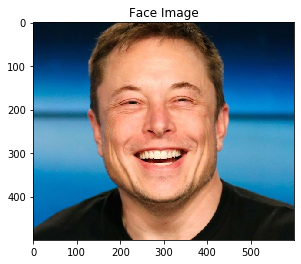

In [4]:
plt.imshow(faceImage[:,:,::-1]); plt.title("Face Image")

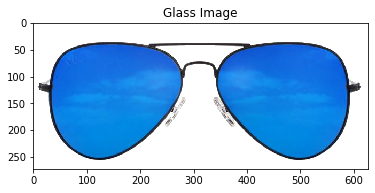

In [5]:
plt.imshow(glassImageBGR[:,:,::-1]); plt.title("Glass Image");

Text(0.5, 1.0, 'Glass Image Mask')

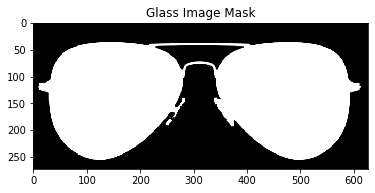

In [6]:
plt.imshow(glassImageMask); plt.title("Glass Image Mask")

Converting The images to float32 for performing arithmetic operations

In [7]:
faceImage = np.float32(faceImage)/255
glassImage = np.float32(glassImage)/255
glassImageBGR = np.float32(glassImageBGR)/255
glassImageMask = np.float32(glassImageMask)/255

Getting Values for height width and channels of glass image after resizing to fit main face image.

In [8]:
glassImage = cv2.resize(glassImage, None, fx= 0.5, fy=0.5)
glassImageBGR = cv2.resize(glassImageBGR,None, fx=0.5, fy=0.5)
glassHeight, glassWidth, nChannels = glassImage.shape

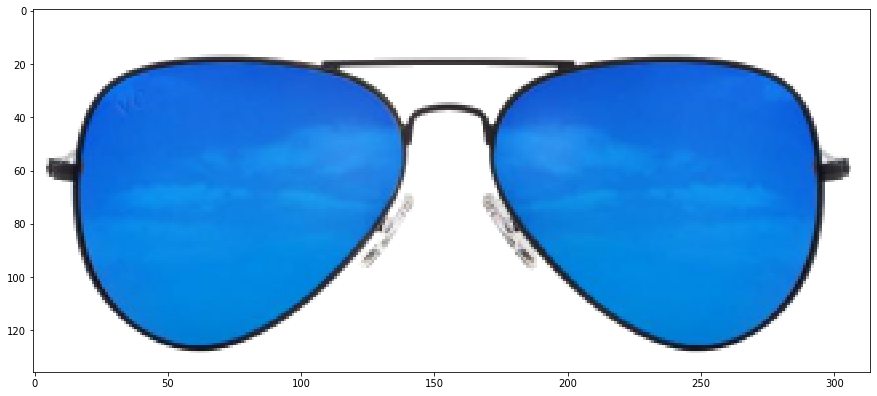

In [9]:
plt.figure(figsize=[15,15])
plt.imshow(glassImageBGR[:,:,::-1])

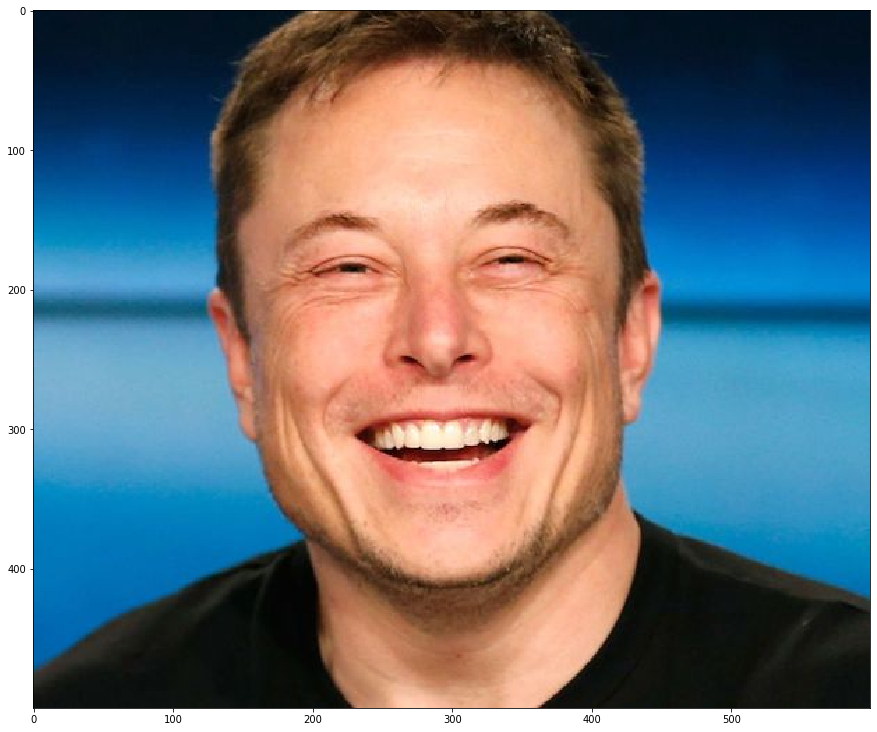

In [10]:
plt.figure(figsize=[15,15])
plt.imshow(faceImage[:,:,::-1])


Setting Row and column for placing the sunglass image on the face image.

In [11]:
topLeftRow = 130
topLeftColumn = 130

In [12]:
bottomRightRow = topLeftRow + glassHeight
bottomRightColumn = topLeftColumn + glassWidth

In [13]:
NaiveReplace = faceImage.copy()

In [14]:
NaiveReplace[topLeftRow:bottomRightRow,topLeftColumn:bottomRightColumn] = glassImageBGR

(500, 600, 3)

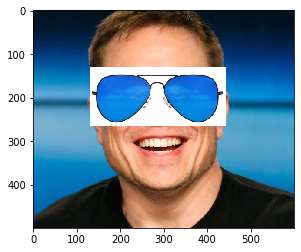

In [15]:
plt.imshow(NaiveReplace[:,:,::-1]); NaiveReplace.shape

As it is seen the naiveReplace method of simple replacing the pixel area with the image of the glass will not make it look proper as the image replaced is
opaque as it is only containing the 3 channnels and not the alpha channel or the masked image. 

In order to place the glasses on the image i will instead use arithmetic operations after creating a masked image of the glasses using the alpha channel copy
I made earlier.

### Using Arithmetic Operations and alpha Channel 

First lets multiply the mask channel with the glass image in order to get the masked glass image


However, in order to do so we need to have same dimensions as input image.

In [16]:
glassImageMask = cv2.merge((glassImageMask,glassImageMask,glassImageMask))

Creating a copy of faceImage into faceImageArith to use for arithmetic operations.

In [17]:
faceImageArith = faceImage.copy()

Now i get the region of the eye from the image using previously calculated row and column values

In [18]:
eyeROI = faceImageArith[topLeftRow:bottomRightRow, topLeftColumn:bottomRightColumn]

(136, 314, 3) (273, 627, 3)


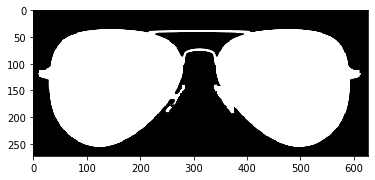

In [19]:
plt.imshow(glassImageMask[:,:,::-1]); print(eyeROI.shape,glassImageMask.shape)

Above Image show region of eye image

In [20]:
glassImageMask = cv2.resize(glassImageMask, (314,136))

In [21]:
glassImageMaskCopy = glassImageMask.copy

In [44]:
glassImageMask = glassImageMask * 0.5 ##This is done to increase transparency of glass (i.e. intensity values for alpha channel is its transparency, high intensity = low transparency)

In [45]:
glassImageMask.max()

0.375

In [46]:
maskedEye = cv2.multiply(eyeROI,(1-glassImageMask)); maskedEye.shape

(136, 314, 3)

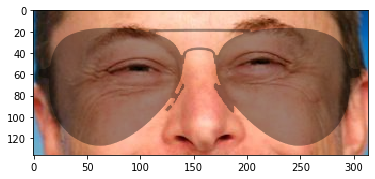

In [47]:
plt.imshow(maskedEye[:,:,::-1])

In [48]:
maskedGlass = cv2.multiply(glassImageBGR,glassImageMask)

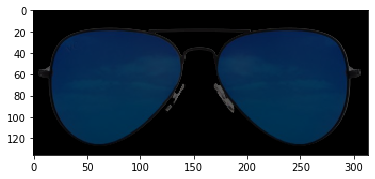

In [49]:
plt.imshow(maskedGlass[:,:,::-1])

In [50]:
eyeROIFinal = cv2.add(maskedGlass,maskedEye)

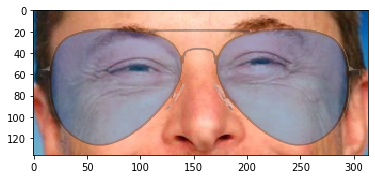

In [51]:
plt.imshow(eyeROIFinal[:,:,::-1])

now we can simply add the eeyeROIFInal with the eye roi of the original face image

In [52]:
finalGlassFaceImage = faceImage.copy()  

In [53]:
finalGlassFaceImage[topLeftRow:bottomRightRow , topLeftColumn:bottomRightColumn] = eyeROIFinal

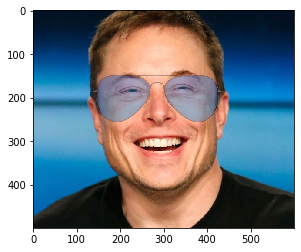

In [54]:
plt.imshow(finalGlassFaceImage[:,:,::-1])


and there you go the sunglasses have been put onto the face image.

In [55]:
print(finalGlassFaceImage)

[[[0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  ...
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]]

 [[0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  ...
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]]

 [[0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  [0.13725491 0.07450981 0.00784314]
  ...
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]
  [0.1254902  0.05882353 0.00784314]]

 ...

 [[0.05882353 0.07450981 0.05490196]
  [0.05490196 0.07058824 0.05098039]
  [0.05490196 0.07058824 0.05098039]
  ...
  [0.05490196 0.07058824 0.05098039]
  [0.05490196 0.07058824 0.05098039]
  [0.05490196 0.07058824 0.05098039]]

 [[0.0627451  0.07843138 0.05882353]
  [0.05882353 0.07450981 0.05490196]
